In [0]:
import numpy as np
import cv2
import math as m
import matplotlib.pyplot as plt


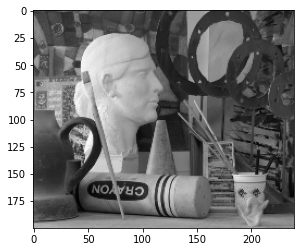

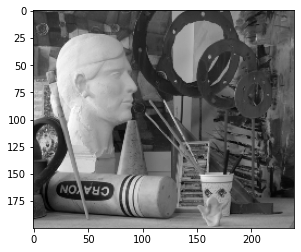

In [73]:
imgL = cv2.imread('pair1-L.png',cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('pair1-R.png',cv2.IMREAD_GRAYSCALE)
imgL=cv2.resize(imgL,(240,200))
imgR=cv2.resize(imgR,(240,200))
'''print("Shape of left image:", imgL.shape)'''
plt.imshow(imgL,'gray')
plt.show()
'''print("\nShape of right image:", imgR.shape)'''
plt.imshow(imgR,'gray')
plt.show()
stop_param=None

In [0]:
def computeDisparity(imgL, imgR, sz_win, numDisp, step=1):
  sz_imgL = imgL.shape
  sz_imgR = imgR.shape

  disp_map=np.zeros(sz_imgL)
  for i in range(sz_imgL[0]):
    for j in range(0,sz_imgL[1]-sz_win[1]):
      ssd = [m.inf, 0]
      for l in range(max(0, j-numDisp),min(sz_imgL[1]-sz_win[1], j+numDisp), step):
          sum1 = 0
          winL = imgL[i:min(i+sz_win[0]+1, sz_imgL[0]), j:j+sz_win[1]+1]
          winR = imgR[i:min(i+sz_win[0]+1, sz_imgL[0]), l:l+sz_win[1]+1]
          sum1=np.sum(np.square(winL-winR))
          if sum1<ssd[0]:
            ssd = [sum1, abs(l-j)]

      disp_map[i][j] = ssd[1]
  return disp_map

In [0]:
def normalizeDespMap(disp_map,passv):
  maximum = np.amax(disp_map)
  print(maximum)
  disp_map = (disp_map*255)//maximum
  if passv==1:
    sz_imgR = imgR.shape
    var_d=0
    global stop_param
    for j in range(int(sz_imgR[1]/2),sz_imgR[1]-sz_win[1]):
      var_disp=np.var(disp_map[0:][j:j+int(sz_imgR[1]/10)])
      if var_disp>var_d:
        var_d=var_disp
        stop_param=sz_imgR[1]-sz_win[1]-j
  print(stop_param)
  return disp_map

Enter space separated values for height and width of the window: 16 16
Enter the neighbourhood size of a pixel50
50.0
None


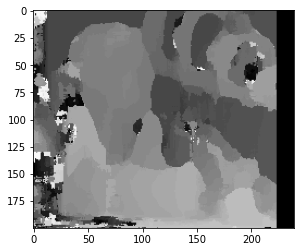

In [76]:
sz_win = tuple(map(int, input("Enter space separated values for height and width of the window: ").split()))
#step = int(input("Enter the pixel steps: "))
numDisp=int(input("Enter the neighbourhood size of a pixel"))
disp_mapL = computeDisparity(imgL, imgR, sz_win, numDisp)
ndisp_mapL=normalizeDespMap(disp_mapL,passv=0)
plt.imshow(ndisp_mapL,'gray')
plt.show()

50.0
25


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


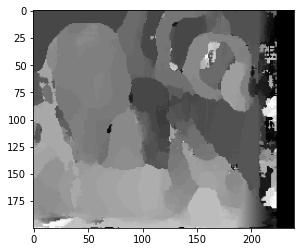

In [77]:
'''sz_win = tuple(map(int, input("Enter space separated values for height and width of the window: ").split()))
#step = int(input("Enter the pixel steps: "))
numDisp=int(input("Enter the neighbourhood size of a pixel"))'''
disp_mapR = computeDisparity(imgR, imgL, sz_win, numDisp)
ndisp_mapR=normalizeDespMap(disp_mapR,passv=1)
plt.imshow(ndisp_mapR,'gray')
plt.show()


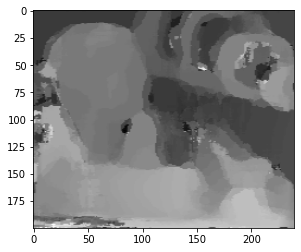

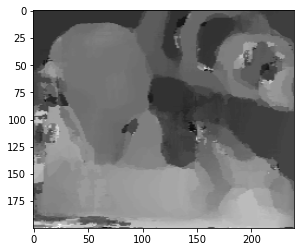

In [79]:
#disp_map = np.zeros(disp_mapL.shape)
disp_map = np.zeros((200,240-sz_win[1]-stop_param))
for i in range(disp_map.shape[0]):
  for j in range(disp_map.shape[1]):
    disp_map[i][j] = (disp_mapL[i][j+stop_param]+disp_mapR[i][j])/2
disp_map=cv2.resize(disp_map,(240,200))    
plt.imshow(disp_map,'gray')
plt.show()    
disp_map = np.zeros((200,200))
for i in range(disp_map.shape[0]):
  for j in range(disp_map.shape[1]):
    disp_map[i][j] = (disp_mapL[i][j+20]+disp_mapR[i][j])/2
disp_map=cv2.resize(disp_map,(240,200))    
plt.imshow(disp_map,'gray')
plt.show()  